# Import Data and Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create path
path = r'/Users/mimielaurant/Documents/Career Foundry/Immersion_Achievement 4/Instacart Basket Analysis'

In [3]:
# import orders_products_all.pkl
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
ords_prods_all.shape

(32404859, 33)

In [22]:
ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   order_id                      int64   
 1   user_id                       int64   
 2   order_number                  int64   
 3   orders_day_of_week            int64   
 4   order_hour_of_day             int64   
 5   days_since_last_order         float64 
 6   product_id                    int64   
 7   add_to_cart_order             int64   
 8   reordered                     int64   
 9   _merge                        category
 10  product_name                  object  
 11  aisle_id                      int64   
 12  department_id                 int64   
 13  prices                        float64 
 14  price_range_loc               object  
 15  busiest_day                   object  
 16  busiest_days                  object  
 17  busiest_period_of_day         object  
 18  

In [25]:
#rename n_dependants column
ords_prods_all.rename(columns = {'n_dependants' : 'number_of_dependents'}, inplace = True)

In [27]:
ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   order_id                      int64   
 1   user_id                       int64   
 2   order_number                  int64   
 3   orders_day_of_week            int64   
 4   order_hour_of_day             int64   
 5   days_since_last_order         float64 
 6   product_id                    int64   
 7   add_to_cart_order             int64   
 8   reordered                     int64   
 9   _merge                        category
 10  product_name                  object  
 11  aisle_id                      int64   
 12  department_id                 int64   
 13  prices                        float64 
 14  price_range_loc               object  
 15  busiest_day                   object  
 16  busiest_days                  object  
 17  busiest_period_of_day         object  
 18  

# Visualizations

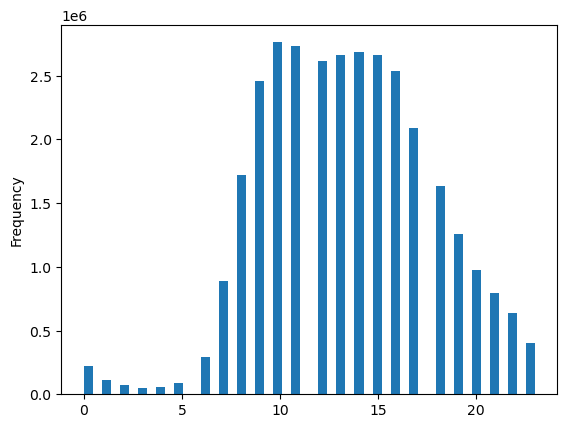

In [10]:
# 3. create a histogram of the "order_hour_of_day" column
hist = ords_prods_all['order_hour_of_day'].plot.hist(bins = 50)

It appears that most orders are placed between 8am and 6pm. There are two unexplained gaps in the visual that appear to be at noon an 5pm.

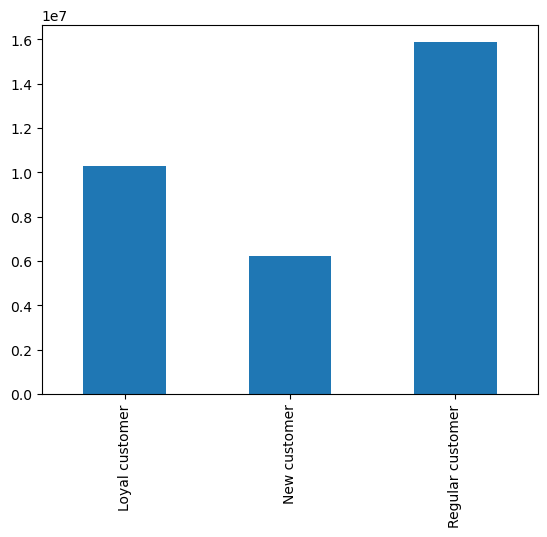

In [11]:
# 4. create a bar chart from the "loyalty_flag" column
bar = ords_prods_all['loyalty_flag'].value_counts().sort_index().plot.bar()

In [12]:
np.random.seed(4)

In [13]:
# create a list of True/False values to the test no.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [14]:
# store 70% of the sample in the dataframe big
big = ords_prods_all[dev]

In [15]:
# store 30% of the sample in the dataframe small
small = ords_prods_all[~dev]

In [16]:
len(ords_prods_all)

32404859

In [17]:
len(big) + len(small)

32404859

In [18]:
# create a subset of "prices" and "order_hour_of_day" for line chart
df = small[['prices', 'order_hour_of_day']]

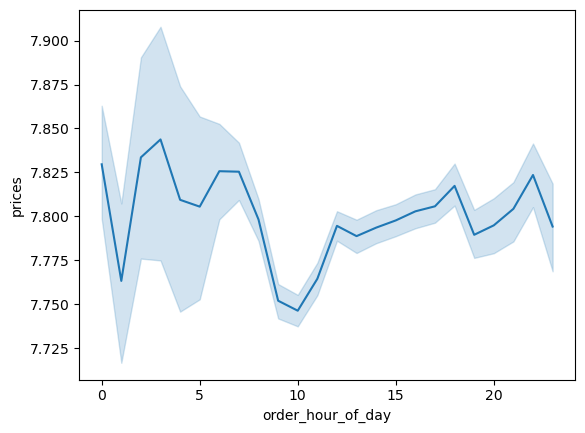

In [19]:
# 5. create a line chart to check if there is a difference in expenditure depending on the hour of the day
line = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')

In [28]:
# create a subset of 'age' and 'number of dependents' for line chart
df_2 = small[['age', 'n_dependants']]

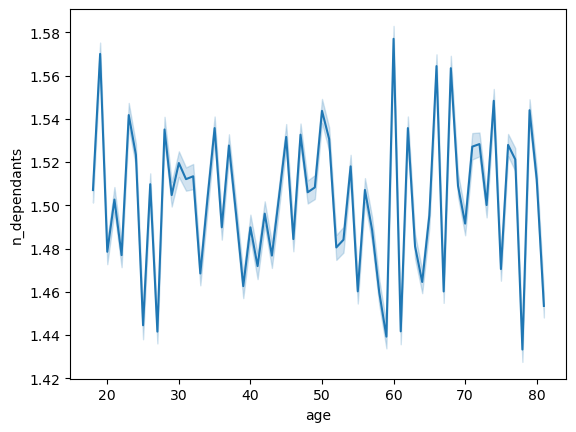

In [24]:
# 6. create a line chart exploring the connections between age of number of dependents
line_2 = sns.lineplot(data = df_2, x = 'age', y = 'n_dependants')

There doesn't appear to be a correlation between the age of the customer and the number of dependents.

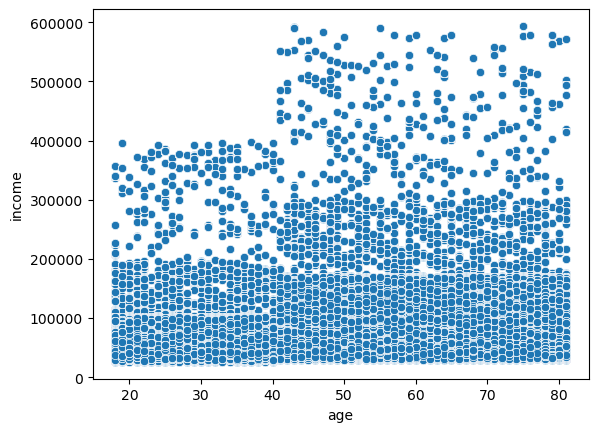

In [31]:
# 7. create a scatterplot exploring the connection between age and spending power
scatterplot = sns.scatterplot(x = 'age', y = 'income', data = small)

It appears that customers over the age of 40 have more spending power than those between the ages of 20-40.

# Export 

In [32]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_of_day.png'))

In [33]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [34]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_day_prices.png'))

In [35]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependents.png'))

In [36]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_income_age.png'))